<a href="https://colab.research.google.com/github/divyansh1195/Deep-Learning/blob/master/Deep-Learning/CNN/Tomato%20Leaf%20Disease%20Detection/Tomato_Leaf_Disease_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning Tomato Leaf Disease Detection (Kaggle Dataset)


## In this notebook, I have made an attempt to classify various leaf diseases associated with tomato plant into 10 different categories using InceptionV3 CNN pre-trained model. The dataset for this notebook was taken from Kaggle.

dataset link: https://www.kaggle.com/adityasangle/tomato-disease-detection

In [ ]:
#First, I need to install Tensorflow
! pip install tensorflow-gpu

In [ ]:
#GPU SpecSheet
!nvidia-smi

Thu Sep 10 08:20:32 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.66       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   62C    P8    11W /  70W |      0MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

#### Importing the Libraries and the dataset

In [ ]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [ ]:
# import the libraries

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
# re-size all the images and importing the dataset from Google Drive
IMAGE_SIZE = [224, 224]

# importing the dataset
train_path = '/content/drive/My Drive/Datasets/Tomato Leaf Disease Classification/train'
valid_path = '/content/drive/My Drive/Datasets/Tomato Leaf Disease Classification/valid'

#### Model Selection and Fitting

In [ ]:
# Here, I will be using InceptionV3 model with imagenet weights

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
#include_top=False because I don't want to use my first and last layer

In [ ]:
# Don't train existing weights because I want to use all the weights from model
for layer in inception.layers:
    layer.trainable = False

In [ ]:
# useful for getting to know about number of output classes
folders = glob('/content/drive/My Drive/Datasets/Tomato Leaf Disease Classification/train/*')

In [ ]:
folders
# length of folders will ge me the no. of classes

['/content/drive/My Drive/Datasets/Tomato Leaf Disease Classification/train/Tomato___Early_blight',
 '/content/drive/My Drive/Datasets/Tomato Leaf Disease Classification/train/Tomato___Septoria_leaf_spot',
 '/content/drive/My Drive/Datasets/Tomato Leaf Disease Classification/train/Tomato___Tomato_mosaic_virus',
 '/content/drive/My Drive/Datasets/Tomato Leaf Disease Classification/train/Tomato___healthy',
 '/content/drive/My Drive/Datasets/Tomato Leaf Disease Classification/train/Tomato___Bacterial_spot',
 '/content/drive/My Drive/Datasets/Tomato Leaf Disease Classification/train/Tomato___Late_blight',
 '/content/drive/My Drive/Datasets/Tomato Leaf Disease Classification/train/Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 '/content/drive/My Drive/Datasets/Tomato Leaf Disease Classification/train/Tomato___Spider_mites Two-spotted_spider_mite',
 '/content/drive/My Drive/Datasets/Tomato Leaf Disease Classification/train/Tomato___Target_Spot',
 '/content/drive/My Drive/Datasets/Tomato Leaf Dise

In [ ]:
x = Flatten()(inception.output)
# flatten the last layer because I won't be having the last layer

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)
# softmax activation for multiple categories
# len(folders) signifies the output node that I want

# Create a Model object
model = Model(inputs=inception.input, outputs=prediction)

In [ ]:
# Model Structure
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [ ]:
# Assigning cost function and optimizer  to the Model
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
# Using the ImageDataGenerator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)#data augmentation

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Make sure to provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/My Drive/Datasets/Tomato Leaf Disease Classification/train',
                                                 target_size = (224, 224),
                                                 batch_size = 16,
                                                 class_mode = 'categorical')
#since, ram size is low, change batch size from 32 to 16

Found 18345 images belonging to 10 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/My Drive/Datasets/Tomato Leaf Disease Classification/valid',
                                            target_size = (224, 224),
                                            batch_size = 16,
                                            class_mode = 'categorical')

Found 4585 images belonging to 10 classes.


In [ ]:
# Fit the Model
# Note:It will take some good amount of time to execute
incept = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=2,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/2
1147/1147 [==============================] - 9599s 8s/step - loss: 3.9593 - accuracy: 0.6808 - val_loss: 3.7603 - val_accuracy: 0.7433
Epoch 2/2
1147/1147 [==============================] - 248s 216ms/step - loss: 3.5170 - accuracy: 0.7919 - val_loss: 3.5347 - val_accuracy: 0.7900


I takes a lot of time to fit and run. Therefore, I have only taken 2 epochs 

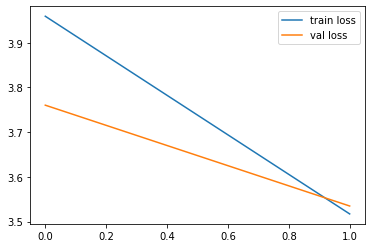

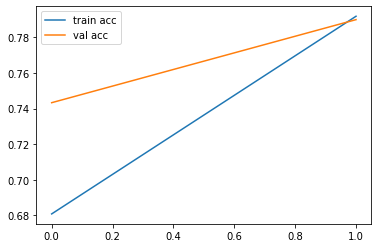

<Figure size 432x288 with 0 Axes>

In [ ]:
# Plot the Loss Function
plt.plot(incept.history['loss'], label='train loss')
plt.plot(incept.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# Plot the Accuracy
plt.plot(incept.history['accuracy'], label='train acc')
plt.plot(incept.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
# Save it as a .h5 file
from tensorflow.keras.models import load_model
model.save('model_inception.h5')

In [ ]:
y_pred = model.predict(test_set)

In [ ]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)# Returns indices of the max element of the array in a particular axis

In [ ]:
y_pred

array([2, 4, 6, ..., 3, 5, 7])